In [1]:
import numpy as np
import xarray as xr
import os

In [2]:
from matplotlib import cm, colors
import matplotlib.pyplot as plt
%matplotlib inline

# GGMplus (Global Gravity Model plus) Gravity Acceleration dataset
http://ddfe.curtin.edu.au/gravitymodels/GGMplus/GGMplus_readme.dat

In [3]:
def ggmplus2013_v4(tilename):
    # read binary data
    data=np.fromfile(tilename,dtype='>i4').astype(np.float)
    size = int(np.sqrt(len(data)))
    data[data==-2**31] = np.nan
    # scale data
    data = 0.1*data
    data = data.reshape(size,size,order='F')

    fname = os.path.basename(tilename)
    snflag,sn,ewflag,ew = 1 if fname[0]=='N' else -1,int(fname[1:3]),1 if fname[3]=='E' else -1,int(fname[4:7])
    lats = np.linspace(sn*snflag + 0.001, sn*snflag + 5 - 0.001,size)
    lons = np.linspace(ew*ewflag + 0.001, ew*ewflag + 5 - 0.001,size)
    # make Xarray
    da = xr.DataArray(data,
                          coords=[lats,lons],
                          dims=['lat','lon'])
    da.attrs['epsg'] = 4326
    return da

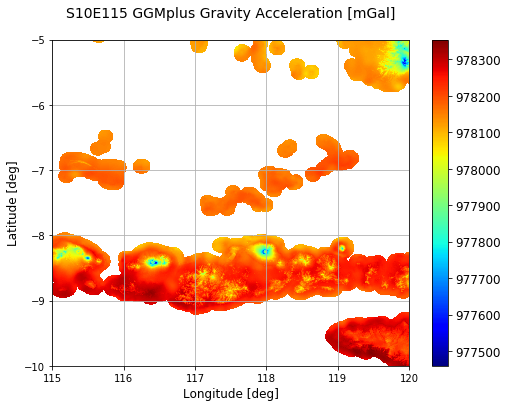

In [4]:
tilename = 'S10E115.ga'
da = ggmplus2013_v4(tilename)
plt.figure(figsize=(8,6))
p = da.plot(cmap='jet', add_colorbar=False)
cbar = plt.colorbar(p)
cbar.ax.tick_params(labelsize=12)
plt.grid()
plt.xlabel("Longitude [deg]", fontsize=12)
plt.ylabel("Latitude [deg]", fontsize=12)
tile = os.path.splitext(os.path.basename(tilename))[0]
plt.title(tile + " GGMplus Gravity Acceleration [mGal]\n", fontsize=14)
#plt.savefig(os.path.basename(tilename)+'.png', quality=98, dpi=300)
plt.show()